# Laboratorio 2 - Parte 1

### Modelos no paramétricos

### 2018-II

#### Profesor: Julián D. Arias Londoño
#### julian.ariasl@udea.edu.co


## Guía del laboratorio

En esta archivo va a encontrar tanto celdas de código cómo celdas de texto con las instrucciones para desarrollar el laboratorio.

Lea atentamente las instrucciones entregadas en las celdas de texto correspondientes y proceda con la solución de las preguntas planteadas.

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

In [1]:
#Tomado de https://github.com/rramosp/mooc-grader
from Autentication import *#python 3
import inspect, urllib
html, auth_code, userinfo = google_authenticate(PORT_NUMBER=8080)
html


Haga click en el siguiente enlace para autenticarse con su cuenta de correo institucional
https://accounts.google.com/o/oauth2/auth?client_id=893762525034-g9d91ddls9e19a1q77c7hsq2rhgqo9h7.apps.googleusercontent.com&response_type=code&scope=profile+email&redirect_uri=http%3A%2F%2Flocalhost%3A8080&access_type=offline
waiting for authentication ...
authentication succeeded
/?code=4/RwAfR7G32llwJQuGYOG95G36Z0uUf2_MdR-h8wdp-wa_LWGGqnC8OylmEJR2xDDR1ymS0I0mYS3Yt15JEePdbJs


,deiry.navas@udea.edu.coDEIRY SOFIA NAVAS MURIELgoogle id: 101322270602976799461


#### Segundo integrante: 
David Alejandro Marín Alzate

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division

#Algunas advertencias que queremos evitar
import warnings
warnings.filterwarnings("always")

## Ejercicio 1

Genere un conjunto de 1000 muestras artificiales con una distribución que corresponda a la suma de dos Gaussiana con diferente media, ambas de una sola dimension. Grafique el histograma de los datos generados.
![ ](random.png)

(array([ 36.,  78., 107., 121., 155., 177., 146.,  89.,  70.,  21.]),
 array([3.18073409, 3.37019838, 3.55966267, 3.74912696, 3.93859125,
        4.12805554, 4.31751983, 4.50698412, 4.69644841, 4.8859127 ,
        5.07537699]),
 <a list of 10 Patch objects>)

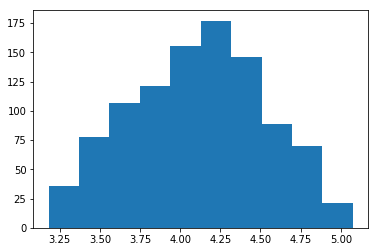

In [15]:
gauss1 = np.random.rand(1000,1) + 2
gauss2 = np.random.rand(1000,1) + 1.1
gaussT = gauss1 + gauss2

plt.hist(gaussT)


## Ejercicio 2

Para el problema de regresion usaremos la misma base de datos del laboratorio anterior.

In [3]:
#cargamos la bd que está en un archivo .data y ahora la podemos manejar de forma matricial
db = np.loadtxt('DB/AirQuality.data',delimiter='\t')  # Assuming tab-delimiter

#Esta es la base de datos AirQuality del UCI Machine Learning Repository. En la siguiente URL se encuentra toda
#la descripción de la base de datos y la contextualización del problema.
#https://archive.ics.uci.edu/ml/datasets/Air+Quality#

X = db[:5000,0:12]
Y = db[:5000,12]

Describa cómo esta construida la base de datos utilizada en el problema de regresion: 

2.1 ¿Cuántas muestras hay en total?:

2.2 ¿Cuántas características tiene el problema?:

## Ejercicio 3

Analice los siguientes métodos a la luz de la teoría vista para los modelos de K vecinos más cercanos (KNN) y complete el código del método KNN.

<b>Nota</b>: Para el cáculo de la distancia entre vectores tienen dos opciones, usar la función scipy.spatial.distance.euclidean o usar la función numpy.linalg.norm. Revisen la documentación para comprender su uso. También serán de utilidad las funciones numpy.sort y numpy.argsort.


In [196]:
 from scipy import stats
import operator


#Mean Absolute Percentage Error para los problemas de regresión
def MAPE(Y_est,Y):
    N = np.size(Y)
    mape = np.sum(abs((Y_est.reshape(N,1) - Y.reshape(N,1))/Y.reshape(N,1)))/N
    return mape 

#Para calcular el error en los problemas de clasificación
def error(Y_lest, Y):
    error = 0
    for ye, y in zip(Y_lest, Y):
        if ye != y:
            error += 1
    
    error = error/np.size(Y)
    
    return error


def KNN(X_train, Y_train, X_val, k, tipo):
    
    #X_train es la matriz con las muestras de entrenamiento
    #Y_train es un vector con los valores de salida pra cada una de las muestras de entrenamiento
    #X_val es la matriz con las muestras de validación
    #tipo es una bandera que indica si el problema es de regresión o de clasificación.
    tipo = tipo
    k = k    #Parámetro k que equivale al número de vecinos a tener en cuenta para resolver el problema de
               #predicción de la variable de salida
    N = np.shape(Y_train)[0]
    Y_val = np.zeros(N).reshape(N,1)
    Y_train = Y_train.reshape(N,1) #Asigna espacio correctamente de Y
    
    # obtenemos la matriz con todas las distancias de las 1500 muestras nuevas
    # con respecto a todas las 3500 muestras de entrenamiento
    D = distance(X_val, X_train)
    D_argsort = np.argsort(D, axis = 1)
    
    #print("***********D_argsort")
    #print(D_argsort[0:10, : ])   
    
    Nt = len(X_val)
 
    #Matriz con la salida i correspondiente a la posición indicada en D_argsort
    Y_argsort = Yout(k, D_argsort, Y_train)

    Y_val = np.zeros(Nt).T
    

    if(tipo == 0):
        #regresion
        for x in range (Nt):
            average = np.average(Y_argsort[x])
            Y_val[x] = average
            
    elif(tipo == 1):
        #clasificacion
        
        for x in range (Nt):
            mode = stats.mode(Y_argsort[x])           
            Y_val[x] = mode[0].astype(float)
            
    Y_val.reshape(Nt,1)
    print(Y_val)
    #¿por qué no muestra forma correcta del vector?
    
    return Y_val #Debe retornar un vector que contenga las predicciones para cada una de las muestras en X_val, en el mismo orden.  

def distance(X_val, X_train):
    
    L = np.dot(X_val, X_train.T)
    tem = np.sum(X_val * X_val, axis=1).reshape([X_val.shape[0],1])
    tem2 = np.sum(X_train * X_train, axis=1).reshape([1,X_train.shape[0]])
    
    D = np.dot(tem, np.ones((1,X_train.shape[0]))) + np.dot(np.ones((X_val.shape[0],1)), tem2) - 2* L
    D = np.sqrt(D)
    
    return D

#Me retorna la salida Y_i proveniente de la matriz que contiene la posición de la distancia más cortas (vecinos más cercanos)
# de las nuevas muestras
def Yout (k, D_argsort, Y_train):
    N = len(D_argsort)    
    kn = D_argsort[ : , 0: k]
    kn = kn.reshape(len(D_argsort),k)
    Y_val = np.zeros((N,k))

  #  Y_val =np.array( [[Y_train[kn[y,x]] for x in range(k)] for y in range(N)])
    for x in range (N):
        for y in range (k):
               Y_val[x][y] = Y_train[kn[x,y]]
    
    return Y_val
    

## Ejercicio 4

Una vez haya completado el codigo del método de KNN, ejecute varias veces el proceso de entrenamiento y evaluacion cambiando el parametro $k$, el cual es el numero de vecinos, y complete la siguiente tabla con los valores del error MAPE obtenidos:

In [197]:
from numpy import random
from scipy import stats
import math

N = np.size(X,0)

#Validamos el modelo
random.seed(1)
Error = np.zeros(2)
for j in range(2):
    ind=np.random.permutation(N)
    Xtrain = X[ind[0:int(math.ceil(0.7*N))],:]
    Xtest = X[ind[int(math.ceil(0.7*N)):N],:]
    Ytrain = Y[ind[0:int(math.ceil(0.7*N))]]
    Ytest = Y[ind[int(math.ceil(0.7*N)):N]]

    #Normalizamos los datos
    media = np.mean(Xtrain)
    desvia = np.std(Xtrain)
    Xtrain = sc.stats.stats.zscore(Xtrain)
    Xtest = (Xtest - np.matlib.repmat(media, Xtest.shape[0], 1))/np.matlib.repmat(desvia, Xtest.shape[0], 1)

    Yest = KNN(Xtrain, Ytrain, Xtest, 3, 0)#Complete con el llamado apropiado de la función que Uds diseñaron

    #Evaluamos las predicciones del modelo con los datos de test
    # Error[j] = MAPE(Yest,Ytest)
# print('\nError durante la prueba = ' + str(np.mean(Error)) + '+-' + str(np.std(Error)))

[1.47016667 1.47836667 1.4152     ... 1.03643333 1.47836667 0.893     ]
[1.03733333 1.47836667 1.26343333 ... 1.13093333 1.03973333 1.3869    ]


Responda:

4.1 ¿Qué metodología de validación se usa en el experimento?

4.2 ¿Cuántas muestras se usan para el entrenamiento?

4.3 ¿Cuántas muestras se usan para la validación?

#### Tabla de resultados

In [81]:
import pandas as pd
import qgrid
randn = np.random.randn
df_types = pd.DataFrame({
    'Numero de vecinos' : pd.Series(['1', '2', '3', '4', '5', '6', '7', '100'])})
df_types["Error_Prueba"] = ""
df_types["Desviación estándar del error"] = ""
df_types.set_index(['Numero de vecinos'], inplace=True)
df_types["Error_Prueba"][1] = "0.3630"
df_types["Desviación estándar del error"][1] = "0.0061"
#df_types.sort_index(inplace=True)
qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)
qgrid_widget

UWdyaWRXaWRnZXQoZ3JpZF9vcHRpb25zPXsnaGlnaGxpZ2h0U2VsZWN0ZWRSb3cnOiBUcnVlLCAnZnVsbFdpZHRoUm93cyc6IFRydWUsICdyb3dIZWlnaHQnOiAyOCwgJ2VuYWJsZUNvbHVtblLigKY=


Ejecute la siguiente instrucción para dejar guardados en el notebook los resultados de las pruebas.

In [82]:
qgrid_widget.get_changed_df()

,Error_Prueba,Desviación estándar del error
Numero de vecinos,,
1,,
2,0.3630,0.0061
3,,
4,,
5,,
6,,
7,,
100,,


## Ejercicio 5

Ahora debe resolver el mismo problema de regresión, pero con el modelo de ventana de Parzen.

Para el problema de regresión debe completar el código para implementar la función Nadaraya-Watson.

Nota: Los métodos dist_euclidiana y ECM continuan siendo válidos para el modelo ventana de Parzen.


In [87]:
def kernel_gaussiano(x):
    return (np.exp((-0.5)*x**2))

def Nadaraya_Watson(X_train, Y_train, X_val, ancho_h):
    
    h = ancho_h    #Parámetro h que equivale al ancho de la ventana o kernel
            
    return #Debe retornar un vector que contenga las predicciones para cada una de las muestras en X_val, en el mismo orden.  


## Ejercicio 6

Una vez haya completado el codigo del método de Ventana de Parzen, ejecute varias veces el proceso de entrenamiento y evaluacion cambiando el parametro $h$, el cual es el ancho de la función kernel, y complete la siguiente tabla con los valores del error MAPE obtenidos:

#### Tabla de resultados

In [98]:
randn = np.random.randn
df_types2 = pd.DataFrame({
    'Ancho del kernel' : pd.Series(['0.1', '0.9', '1', '2', '3', '5', '10'])})
df_types2["Error_Prueba"] = ""
df_types2["Desviación estándar del error"] = ""
df_types2.set_index(['Ancho del kernel'], inplace=True)
df_types2["Error_Prueba"][1] = "0.3011"
df_types2["Desviación estándar del error"][1] = "0.0031"
#df_types.sort_index(inplace=True)
qgrid_widget = qgrid.show_grid(df_types2, show_toolbar=False)
qgrid_widget

UWdyaWRXaWRnZXQoZ3JpZF9vcHRpb25zPXsnaGlnaGxpZ2h0U2VsZWN0ZWRSb3cnOiBUcnVlLCAnZnVsbFdpZHRoUm93cyc6IFRydWUsICdyb3dIZWlnaHQnOiAyOCwgJ2VuYWJsZUNvbHVtblLigKY=


Ejecute la siguiente instrucción para dejar guardados en el notebook los resultados de las pruebas.

In [99]:
qgrid_widget.get_changed_df()

,Error_Prueba,Desviación estándar del error
Ancho del kernel,,
0.1,,
0.9,0.3011,0.0031
1,,
2,,
3,,
5,,
10,,


Responda:

6.1 Si intenta repetir la prueba anterior para un $h = 0.05$ el algoritmo falla. ¿Cuál es la causa de la falla?:

6.2 ¿Cómo evito que se presente la excepción?: